# Statistical Methods in AI (CSE/ECE 471) - Spring-2020
#  Assignment-2 / **Q4** / Topic: Linear Regression - Weather
# Submitted By: VENUGOPAL REDDY MEKA
# Roll No: 2019900065

In [188]:
# Load the required imports
import matplotlib.pyplot as plt
import seaborn as sns

# use matplotlib inline for Jupyter notebook
%matplotlib inline

import pandas as pd
import numpy as np
from math import sqrt
import sys

In [189]:
def normalize(vec):
    """
    vec is of size (M X 1), i.e. it is a single feature vector
    Returns a normalized vector
    """
    mew = np.average(vec)
    std = np.std(vec)
    return mew, std, (vec - mew) / std


def de_normalize(mew, std, vec):
    """
    mew and std are numbers denoting the original mean and standard deviation of the vector.
    vec is of size (M X 1), i.e. it is a single feature vector
    Returns the de-normalized vector
    """
    return (vec * std) + mew


def squared_error_cost(x, y, theta, lambda_):
    """
    x is (M X (N + 1))
    y is (M X 1)
    theta is ((N + 1) X 1)
    """

    # calculate hypothesis
    h = x @ theta

    # calculate regularization term
    reg_term = np.sum(lambda_ * (theta[1:, :].reshape(theta.shape[0] - 1, 1) ** 2))

    M = x.shape[0]

    # calculate cost and return it
    cost = (1 / (2 * M)) * (np.sum((h - y) ** 2) + reg_term)
    return cost


def gradient_descent(x, y, alpha, lambda_, theta, iterations, create_new_fig):
    """
    x is (M X (N + 1))
    y is (M X 1)
    theta is ((N + 1) X 1)

    Runs gradient descent algorithm for num_iters times and returns the final theta and cost
    Also plots the way cost has varied over time
    """
    M = x.shape[0]
    cost_arr = []

    for i in range(iterations):
        h = x @ theta
        reg_term = lambda_ * theta[1:]
        theta[0] = theta[0] - (alpha / M) * np.sum(h - y)
        theta[1:] = theta[1:] - (alpha / M) * (np.sum((h - y) * x[:, 1:], axis=0, keepdims=True).T + reg_term)
        cost_arr.append(squared_error_cost(x, y, theta, lambda_))

    if create_new_fig:
        fig = plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
        plt.xlabel('iterations')
        plt.ylabel('cost')
        plt.title('lambda=' + str(lambda_))

    plt.plot(cost_arr)

    return theta


def gradient_descent_optimize(train_x, validation_x, train_y, validation_y, alpha, lambda_, iterations, cross_validation_times):
    """
    Performs training on train_x and train_y using the cost_func() cost function

    Starts by randomly initializing the theta vector. Multiple random initializations
    are done, 'cross_validation_times' times, and a global optimal theta is returned
    along with the global_min_cost

    Each random initialization result is tested on validation_x and validation_y
    """

    N = train_x.shape[1]
    min_cost = sys.maxsize
    optimal_theta = np.empty((N, 1))

    # Loop which runs multiple times (Each time trying a new random initialization)
    for i in range(cross_validation_times):
        theta = np.random.rand(N, 1)
        theta = gradient_descent(train_x, train_y, alpha, lambda_, theta, iterations, i == 0)
        cost = squared_error_cost(validation_x, validation_y, optimal_theta, lambda_)
        if cost < min_cost:
            min_cost = cost
            optimal_theta = theta

    return optimal_theta, min_cost


def compute_optimum_coefficients(train_x, validation_x, train_y, validation_y, alpha, possible_lambdas, iterations):
    """
    Computes optimum coefficients
    :param train_x:
    :param validation_x:
    :param train_y:
    :param validation_y:
    :return:
    """
    min_cost = sys.maxsize
    optimal_theta = None
    final_lambda = None

    for lambda_ in possible_lambdas:
        print(f"Optimizing for lambda: {lambda_}")
        theta, cost = gradient_descent_optimize(train_x,
                                                validation_x,
                                                train_y,
                                                validation_y,
                                                alpha,
                                                lambda_,
                                                iterations,
                                                10)
        print(f"Computed coefficients: {theta} and cost: {cost} for lambda: {lambda_}")

        if cost < min_cost:
            min_cost = cost
            optimal_theta = theta
            final_lambda = lambda_

    return min_cost, optimal_theta, final_lambda

## Read the data

In [190]:
train_csv = './Datasets/Question-4/weather.csv'
df = pd.read_csv(train_csv)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [191]:
df.shape

(77285, 11)

## Data cleaning

In [192]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
count,77285,77285,76881,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000,77285
unique,77268,26,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 01:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,25427,68233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15986
mean,NaN,NaN,NaN,11.932073,10.851287,0.734422,10.802289,187.739678,10.350661,1003.218889,NaN
std,NaN,NaN,NaN,9.568044,10.720713,0.195435,6.896763,107.337926,4.189296,117.080764,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,4.561111,2.272222,0.600000,5.828200,117.000000,8.339800,1011.910000,NaN
50%,NaN,NaN,NaN,11.994444,11.994444,0.780000,9.965900,180.000000,10.046400,1016.470000,NaN
75%,NaN,NaN,NaN,18.850000,18.850000,0.890000,14.135800,290.000000,14.812000,1021.080000,NaN


In [193]:
# Drop unnecessary columns
cols = ['Formatted Date', 'Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)']
df = df.drop(cols,axis=1)

In [194]:
df_corr_mat = df.corr()

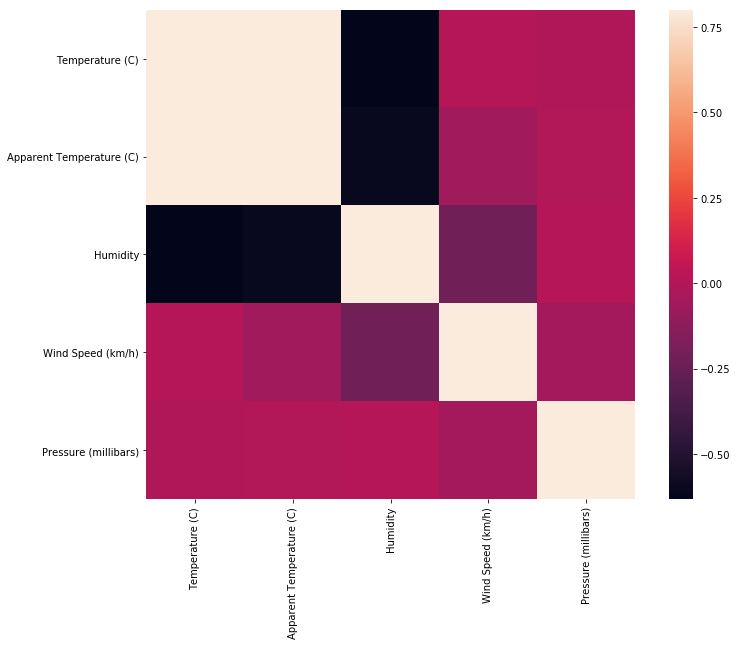

In [195]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_corr_mat, vmax=.8, square=True);

In [196]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,1015.13
1,9.355556,7.227778,0.86,14.2646,1015.63
2,9.377778,9.377778,0.89,3.9284,1015.94
3,8.288889,5.944444,0.83,14.1036,1016.41
4,8.755556,6.977778,0.83,11.0446,1016.51


In [197]:
# data after cleaning
df = df.dropna()
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,1015.13
1,9.355556,7.227778,0.86,14.2646,1015.63
2,9.377778,9.377778,0.89,3.9284,1015.94
3,8.288889,5.944444,0.83,14.1036,1016.41
4,8.755556,6.977778,0.83,11.0446,1016.51


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77285 entries, 0 to 77284
Data columns (total 5 columns):
Temperature (C)             77285 non-null float64
Apparent Temperature (C)    77285 non-null float64
Humidity                    77285 non-null float64
Wind Speed (km/h)           77285 non-null float64
Pressure (millibars)        77285 non-null float64
dtypes: float64(5)
memory usage: 3.5 MB


In [199]:
df_features = df.drop(columns=["Apparent Temperature (C)"], axis=1)
df_features.head()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,9.472222,0.89,14.1197,1015.13
1,9.355556,0.86,14.2646,1015.63
2,9.377778,0.89,3.9284,1015.94
3,8.288889,0.83,14.1036,1016.41
4,8.755556,0.83,11.0446,1016.51


In [200]:
df_target = df[["Apparent Temperature (C)"]]
df_target.head()

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778


In [201]:
y = df_target.values
y.shape

(77285, 1)

In [202]:
x = df_features.values
x.shape

(77285, 4)

In [203]:
col_names = df_target.columns.tolist() + df_features.columns.tolist()
col_names

['Apparent Temperature (C)',
 'Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Pressure (millibars)']

In [204]:
 # normalize the dataset
mew_x = []
std_x = []
M = x.shape[0]
N = x.shape[1]
# Normalize the input features
for i in range(N):
    print(f"Normalizing the input feature: {col_names[i+1]}")
    (mew_val, std_val, x[:, i]) = normalize(x[:, i])
    mew_x.append(mew_val)
    std_x.append(std_val)

# Normalize the target feature
print(f"Normalizing the target feature: {col_names[0]}")
(mew_y, std_y, y) = normalize(y)

# Append ones vector to x, the shape of x will become (M, N+1)
ones_vec = np.ones((M, 1), dtype=int)
x = np.hstack((ones_vec, x))

Normalizing the input feature: Temperature (C)
Normalizing the input feature: Humidity
Normalizing the input feature: Wind Speed (km/h)
Normalizing the input feature: Pressure (millibars)
Normalizing the target feature: Apparent Temperature (C)


In [205]:
train_per=70
validation_per=20
rows = x.shape[0]
cols = x.shape[1]

combined = np.hstack((x, y))
np.random.shuffle(combined)

x = combined[:, :cols]
y = combined[:, cols:]

train_size = int((train_per / 100) * rows)
validation_size = int((validation_per / 100) * rows)

train_x = x[:train_size]
validation_x = x[train_size:train_size + validation_size]
test_x = x[train_size + validation_size:]

train_y = y[:train_size]
validation_y = y[train_size:train_size + validation_size]
test_y = y[train_size + validation_size:]
print(f"X: {x.shape}")
print(f"X: {y.shape}")
print(f"train_x: {train_x.shape}")
print(f"train_y: {train_y.shape}")
print(f"validation_x: {validation_x.shape}")
print(f"validation_y: {validation_y.shape}")
print(f"test_x: {test_x.shape}")
print(f"test_y: {test_y.shape}")

X: (77285, 5)
X: (77285, 1)
train_x: (54099, 5)
train_y: (54099, 1)
validation_x: (15457, 5)
validation_y: (15457, 1)
test_x: (7729, 5)
test_y: (7729, 1)


Optimizing for lambda: 0
Computed coefficients: [[-2.84048111e-04]
 [ 1.01739255e+00]
 [ 3.26816313e-02]
 [-5.53853836e-02]
 [ 3.58264619e-03]] and cost: 0.0051139445336306315 for lambda: 0
Optimizing for lambda: 0.3
Computed coefficients: [[ 0.00203937]
 [ 1.02700336]
 [ 0.04310176]
 [-0.05120861]
 [ 0.00549655]] and cost: 0.005147175725189693 for lambda: 0.3
Optimizing for lambda: 1
Computed coefficients: [[ 3.59989571e-04]
 [ 9.90619120e-01]
 [ 3.92028973e-03]
 [-6.53754396e-02]
 [ 4.49580352e-03]] and cost: 0.005141459138775027 for lambda: 1
Optimizing for lambda: 3
Computed coefficients: [[ 0.00110959]
 [ 0.95728846]
 [-0.0313914 ]
 [-0.07640608]
 [ 0.0043199 ]] and cost: 0.005241056017709899 for lambda: 3


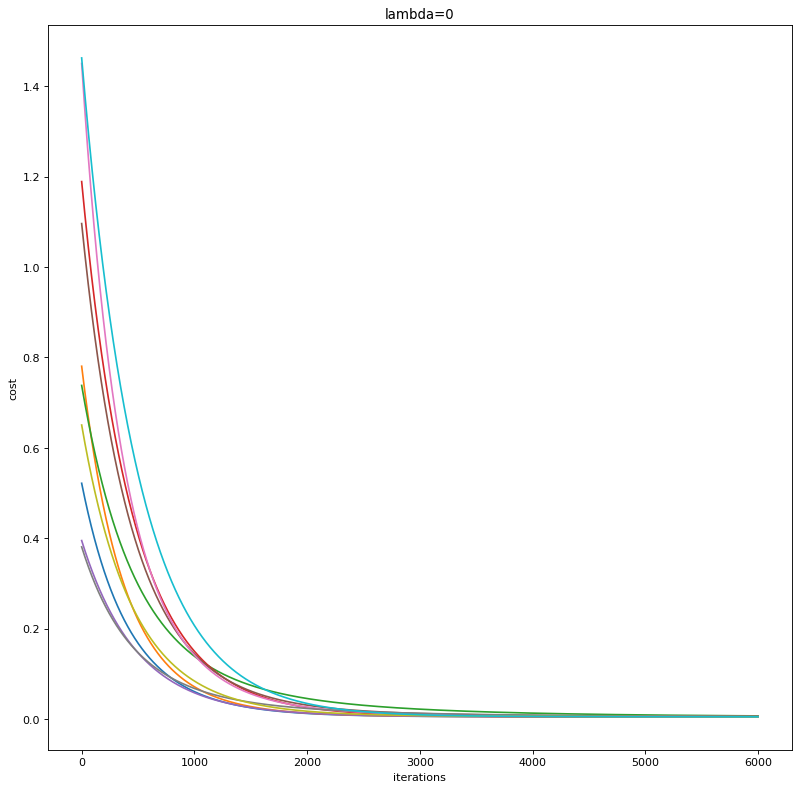

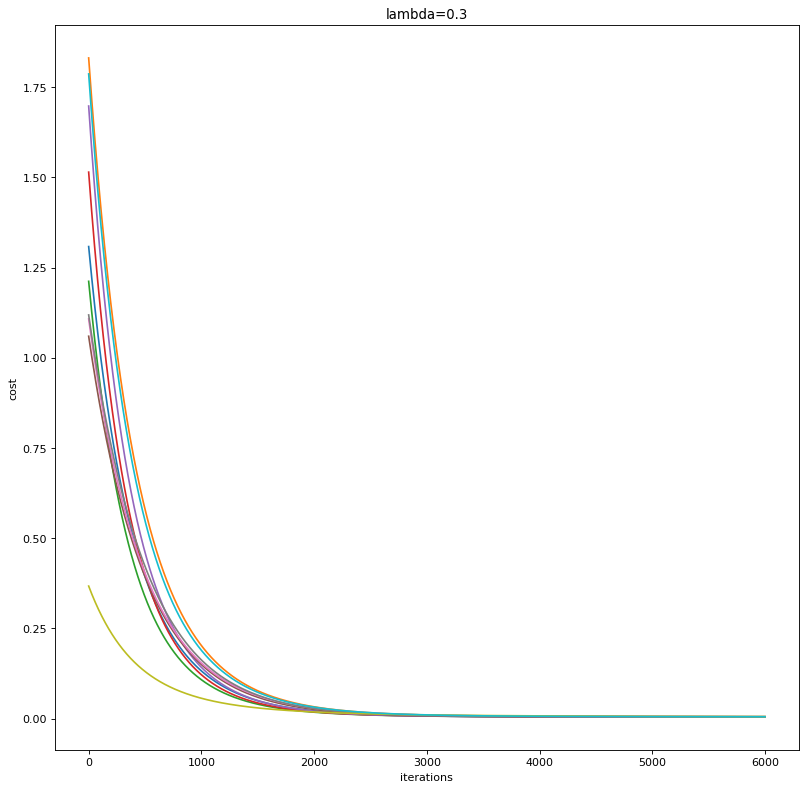

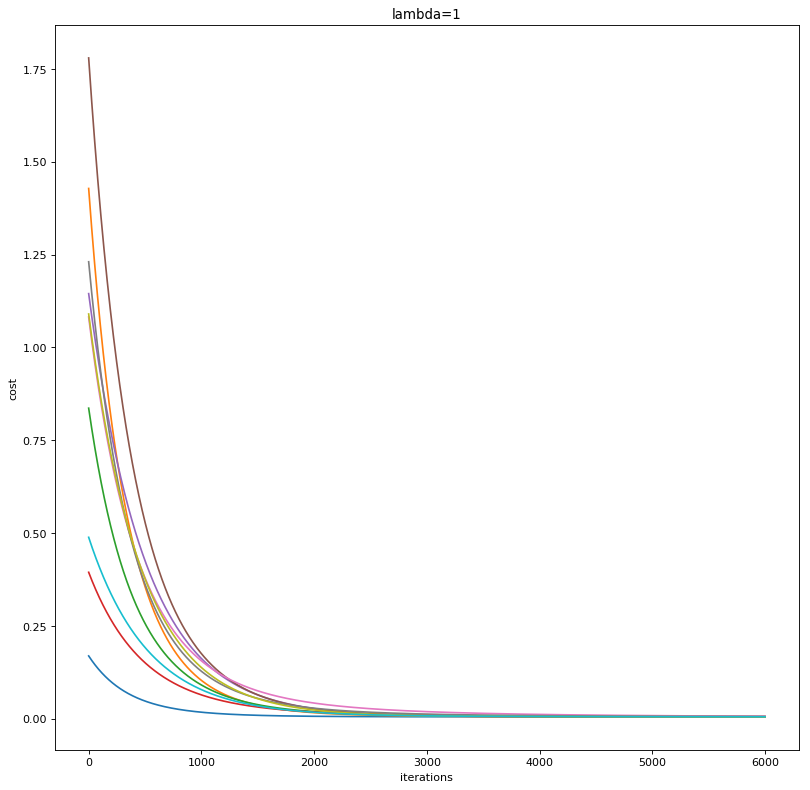

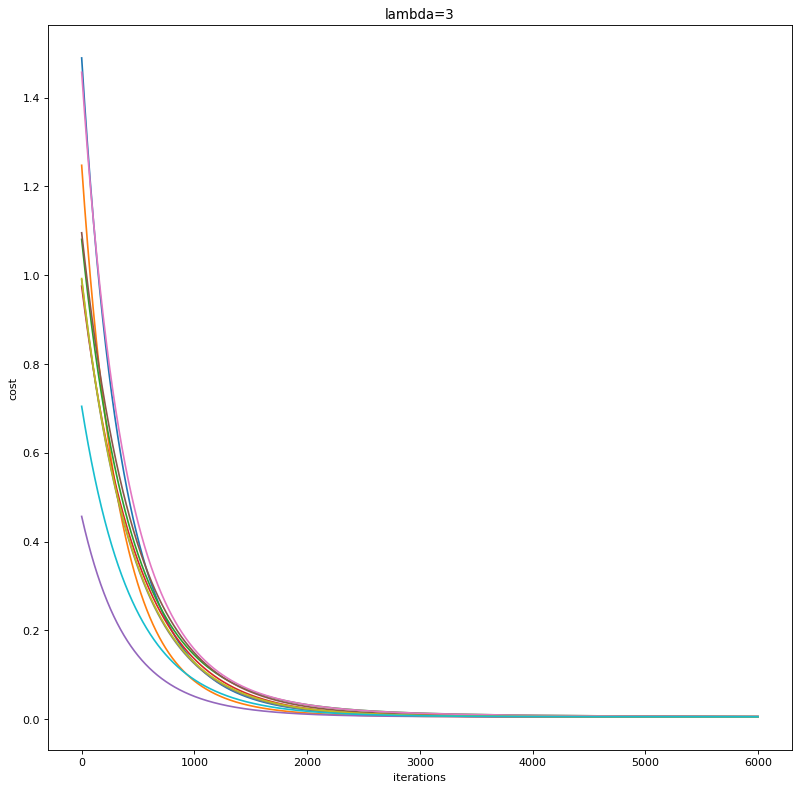

In [206]:
alpha=0.001
iterations=6000
possible_lambdas=[0, 0.3, 1, 3]
min_cost, theta, final_lambda = \
                compute_optimum_coefficients(train_x, validation_x, train_y, validation_y, alpha, possible_lambdas, iterations)

In [207]:
print(f"Min cost : {min_cost}")
print(f"theta: {theta}")

Min cost : 0.0051139445336306315
theta: [[-2.84048111e-04]
 [ 1.01739255e+00]
 [ 3.26816313e-02]
 [-5.53853836e-02]
 [ 3.58264619e-03]]


In [208]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def prediction_test(x_val, y_val, theta, mew_x, std_x, mew_y, std_y, col_names, print_samples, num_samples):
    """
    Performs predictions, given input x, y and theta. Also returns the RMSE accuracy of the predictions

    In order to calculate the RMSE accuracy, the mean and standard deviations (of x's and y's) are required.

    It also has the ability to print few sample prediction results (for comparision purposes)
    """

    h_val = x_val @ theta

    x = np.zeros(shape=x_val.shape)
    y = np.zeros(shape=y_val.shape)

    # Denormalize
    for i in range(1, x.shape[1]):
        x[:, i] = de_normalize(mew_x[i - 1], std_x[i - 1], x_val[:, i])

    y = de_normalize(mew_y, std_y, y_val)
    h = de_normalize(mew_y, std_y, h_val)

    # Calculate the accuracy
    mse_accuracy = mean_squared_error(h, y)
    mean_abs_error = mean_absolute_error(h, y)
    if print_samples:
        # Take few samples for prediction
        sample_x, sample_y, sample_h = sample(x, y, h, num_samples)
        print("Sample prediction results:\n")
        for i in range(sample_x.shape[0]):
            print("***************************************************")
            print("X value: ")
            for j in range(1, sample_x.shape[1]):
                print(f"{col_names[j]}: {sample_x[i][j]}")

            print(f"Y Value {col_names[0]}: {sample_y[i][0]}")
            print(f"Predicted Value: {col_names[0]}: {sample_h[i][0]}")
            print("***************************************************")

    return mse_accuracy, mean_abs_error


def sample(a, b, c, num):
    """
    a and b and c are of size (M X N)
    Returns 'num' no:of samples randomly chosen from a and b
    """
    rand_index = np.arange(a.shape[0]).reshape(a.shape[0], 1)
    np.random.shuffle(rand_index)
    rand_index = rand_index[0:num]
    return a[rand_index].reshape(num, a.shape[1]), b[rand_index].reshape(num, b.shape[1]), c[rand_index].reshape(
        num, c.shape[1])

In [209]:
print("Prediction test on train dataset")
mse_accuracy, mean_abs_error = prediction_test(train_x, train_y, theta, mew_x, std_x, mew_y, std_y, col_names, True, 2)
print(f"MSE on the train dataset: {mse_accuracy}")
print(f"MEAN ABSOLUTE ERROR on the train dataset: {mean_abs_error}")
print("Prediction test on validation dataset")
mse_accuracy, mean_abs_error = prediction_test(validation_x, validation_y, theta, mew_x, std_x, mew_y, std_y, col_names, True, 2)
print(f"MSE on the train dataset: {mse_accuracy}")
print(f"MEAN ABSOLUTE ERROR on the train dataset: {mean_abs_error}")
print("Prediction test on test dataset")
mse_accuracy, mean_abs_error = prediction_test(test_x, test_y, theta, mew_x, std_x, mew_y, std_y, col_names, True, 2)
print(f"MSE on the train dataset: {mse_accuracy}")
print(f"MEAN ABSOLUTE ERROR on the train dataset: {mean_abs_error}")



Prediction test on train dataset
Sample prediction results:

***************************************************
X value: 
Temperature (C): -2.355555555555549
Humidity: 0.96
Wind Speed (km/h): 7.8246
Pressure (millibars): 1029.76
Y Value Apparent Temperature (C): -5.422222222222221
Predicted Value: Apparent Temperature (C): -4.769585120824624
***************************************************
***************************************************
X value: 
Temperature (C): 14.444444444444402
Humidity: 0.93
Wind Speed (km/h): 0.0
Pressure (millibars): 1019.3
Y Value Apparent Temperature (C): 14.444444444444402
Predicted Value: Apparent Temperature (C): 14.99815608279987
***************************************************
MSE on the train dataset: 1.1744851756834285
MEAN ABSOLUTE ERROR on the train dataset: 0.8529516246357058
Prediction test on validation dataset
Sample prediction results:

***************************************************
X value: 
Temperature (C): -1.6444444444444404
H